### Ιωάννης Χουλιάρας --- AM: 2631
#### Παρουσίαση τρίτου ερωτήματος της τελικής εργασίας στο μάθημα επιλογής Υπολογιστική Όραση.

In [35]:
import sys
import cv2
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [36]:
#Η έκδοση του tensorflow && της python:
print('tensorflow: ' + tf.__version__)
print('Python: ' + sys.version)

tensorflow: 1.8.0
Python: 3.6.10 |Anaconda, Inc.| (default, May  7 2020, 23:06:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


###### Για το τρίτο μέρος, αποθήκευσα σε npy τα βαθιά χαρακτηριστικά των εικόνων καθώς έχει ήδη παρουσιαστεί στο δεύτερο μέρος.

In [37]:
def get_deepfeats(image):
    '''
        Just take the correct npy file from disk using the image input from terminal.
    '''
    deepfeats = {
        'city.jpg': 'city.npy',
        'dining.jpg': 'dining.npy',
        'horse_man.jpg': 'horse_man.npy',
        'office.jpg': 'office.npy',
        'plane_train.jpg': 'plane_train.npy',
    }
    return deepfeats[image]

###### Με αυτή την συνάρτηση εκτελώ PCA για να ρίξω τις διαστάστεις σε d = 8

In [38]:
def perform_pca(deepfeats):
    '''
    In this function, we perform PCA to drop the dimension of the tensor to d = 8
    Code was given from the professor on github [https://github.com/dip-course/pca_on_deepfeatures]
    A tensor with H x W x C, we reshape it to an array of HW x C (pixels x dimension of data)
    '''
    N = deepfeats.shape[0]*deepfeats.shape[1]
    C = deepfeats.shape[-1]
    X = np.reshape(deepfeats, [N, C])
    print('Τα αρχικά δεδομένα μου έχουν μέγεθος: {}'.format(X.shape))
    Xreduced = PCA(n_components=8).fit_transform(X)
    print('Μετά το PCA έχουμε μέγεθος: {}'.format(Xreduced.shape))
    return Xreduced

###### Εκτελώ kmeans στα df's. Επίσης κάνω reshape για να επαναφέρω το αρχικό shape των df's. 

In [39]:
def perform_kmeans(deepfeats, df_original_size):
    '''
    Here i will perform the K-means algorithm with number of clusters = 2. That will return
    a binarization of the image where we separate background and point of interest.
    '''
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(deepfeats)
    flatten_labels = kmeans.labels_
    print('The shape of centers is {}'.format(kmeans.cluster_centers_.shape))
    print('The shape of labels is {}'.format(flatten_labels.shape))
    # reshape the labels as the deep feature shape
    final_array = flatten_labels.reshape(
        (df_original_size.shape[0], df_original_size.shape[1]))
    return final_array

In [40]:
def visualize(array, image): 
    fig = plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.imshow(array, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(image)
    plt.show()
    

###### Θα φορτώσω όλα τα npy αρχεία των εικόνων

In [41]:
image1 = 'city.jpg'
image2 = 'dining.jpg'
image3 = 'horse_man.jpg'
image4 = 'office.jpg'
image5 = 'plane_train.jpg'

img_1 = cv2.imread(image1)
img_2 = cv2.imread(image2)
img_3 = cv2.imread(image3)
img_4 = cv2.imread(image4)
img_5 = cv2.imread(image5)

# df = deep feature
df_1 = np.load(get_deepfeats(image1))
df_2 = np.load(get_deepfeats(image2))
df_3 = np.load(get_deepfeats(image3))
df_4 = np.load(get_deepfeats(image4))
df_5 = np.load(get_deepfeats(image5))

Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
The shape of centers is (2, 8)
The shape of labels is (4225,)


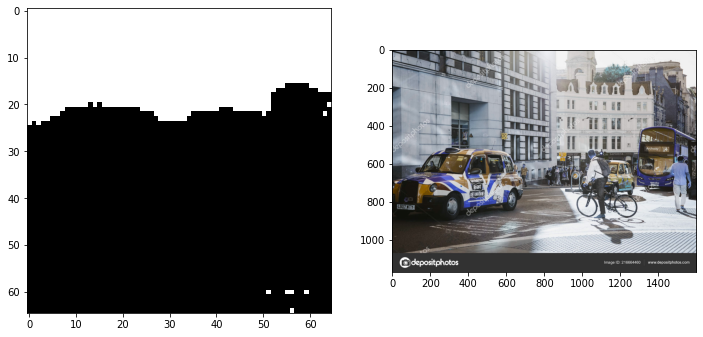

In [42]:
df1_reduced = perform_pca(df_1)
array_1 = perform_kmeans(df1_reduced, df_1)
visualize(array_1, img_1)

Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
The shape of centers is (2, 8)
The shape of labels is (4225,)


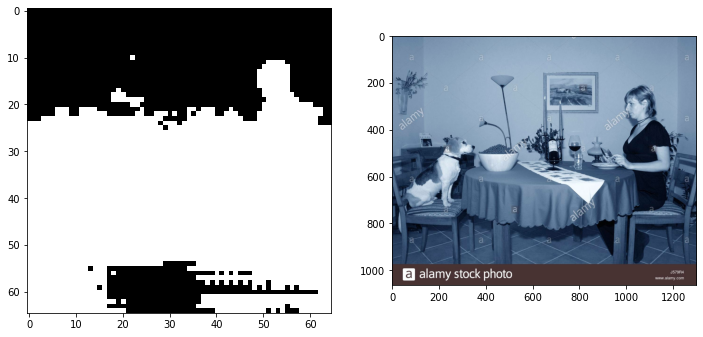

In [43]:
df2_reduced = perform_pca(df_2)
array_2 = perform_kmeans(df2_reduced, df_2)
visualize(array_2, img_2)

Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
The shape of centers is (2, 8)
The shape of labels is (4225,)


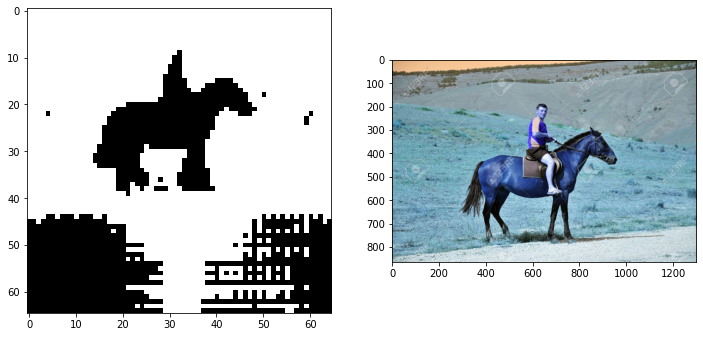

In [44]:
df3_reduced = perform_pca(df_3)
array_3 = perform_kmeans(df3_reduced, df_3)
visualize(array_3, img_3)

Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
The shape of centers is (2, 8)
The shape of labels is (4225,)


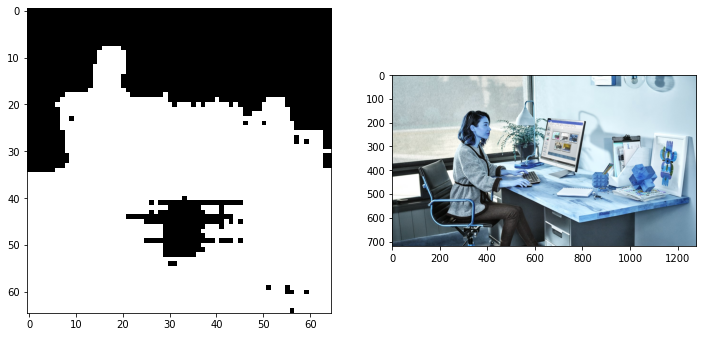

In [45]:
df4_reduced = perform_pca(df_4)
array_4 = perform_kmeans(df4_reduced, df_4)
visualize(array_4, img_4)

Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
The shape of centers is (2, 8)
The shape of labels is (4225,)


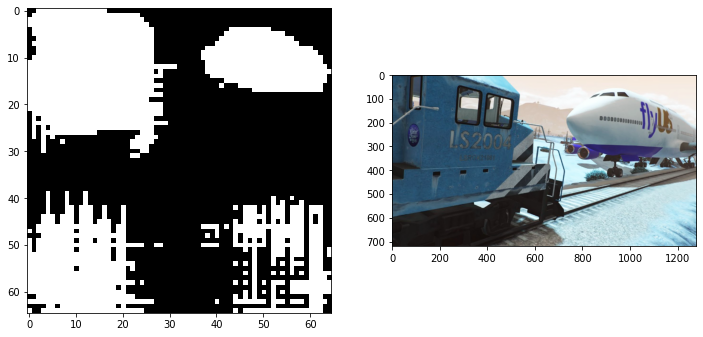

In [47]:
df5_reduced = perform_pca(df_5)
array_5 = perform_kmeans(df5_reduced, df_5)
visualize(array_5, img_5)